In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
import warnings
warnings.filterwarnings('ignore')

from sklearn.manifold import TSNE,MDS
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn_som.som import SOM
import skfuzzy as fuzz

Цель этой части - реализация алгоритмов на различных размерах кластеров - от 2 до 7

In [2]:
df=pd.read_excel("final_data_num.xlsx", index_col=0)

In [3]:
X = np.array(df)

## TSNE

In [4]:
tsne = TSNE()
X_embedded = tsne.fit_transform(X)

Text(0.5, 1.0, 'Уменьшение размерности методом t-SNE')

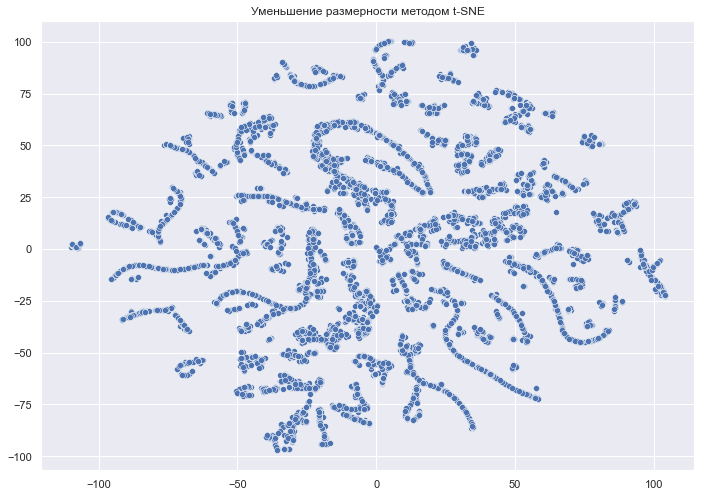

In [5]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1],legend='full', palette=palette).\
set_title("Уменьшение размерности методом t-SNE")

## MDS

In [6]:
l = list(range(X.shape[0]))
random.shuffle(l)
X_rand_1000=X[[l[:1000]]]

embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X_rand_1000)

Text(0.5, 1.0, 'Уменьшение размерности методом MDS')

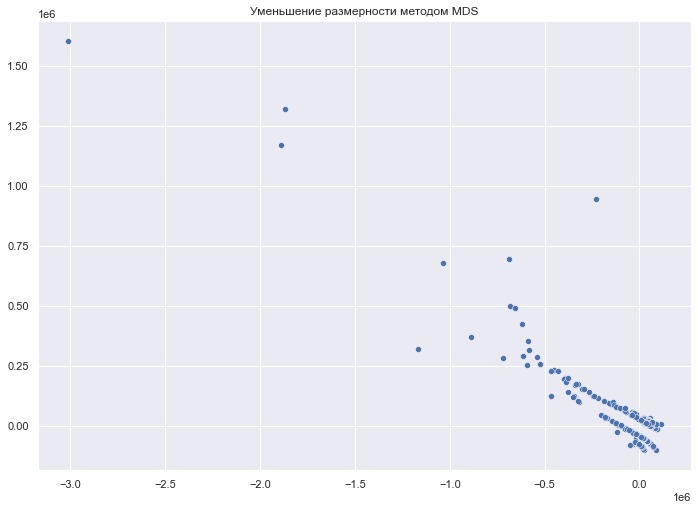

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(X_transformed[:,0],X_transformed[:,1]).\
set_title("Уменьшение размерности методом MDS")

## k-mean

In [8]:
df_res=df.copy()
palette = sns.color_palette("bright", 10)

In [9]:
for i in range (2,8):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    name_col='k_mean_'+str(i)
    df_res[name_col]=kmeans.predict(df)
    
    sns_plot = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=df_res[name_col]).\
    set_title(name_col+"_t-SNE")
    
    sns_plot.get_figure().savefig("image/clustering/"+name_col+"_t-SNE.png")
    plt.clf()
    
    sns_plot1=sns.scatterplot(X_transformed[:,0],X_transformed[:,1],hue=df_res.iloc[l[:1000]][name_col] ).\
    set_title(name_col+"_MDS")
    
    sns_plot1.get_figure().savefig("image/clustering/"+name_col+"_MDS.png")
    plt.clf()

<Figure size 842.4x595.44 with 0 Axes>

## Иерархическая кластеризация

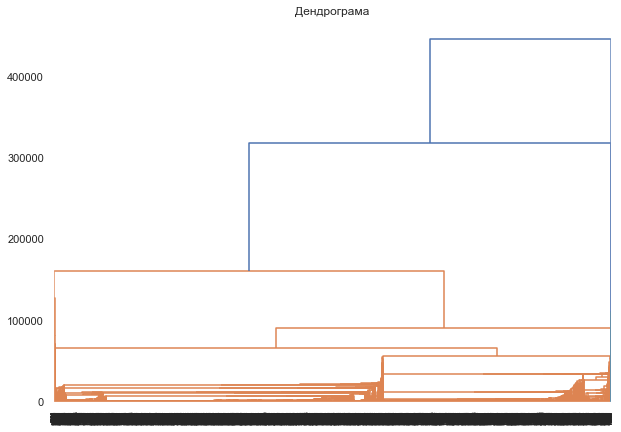

In [10]:
plt.figure(figsize = (10, 7))

linked = linkage(X, 'single')
dendrogram(linked, orientation = 'top',\
            distance_sort ='descending',show_leaf_counts = False)
plt.title("Дендрограма")
plt.savefig("image/clustering/dendrogram.png")

In [11]:
for i in range (2,8):
    name_col='agglomerative_clustering_'+str(i)    
    
    cluster = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    df_res[name_col]=cluster.fit_predict(X)
    
    sns_plot = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=df_res[name_col]).\
    set_title(name_col+"_t-SNE")
    
    sns_plot.get_figure().savefig("image/clustering/"+name_col+"_t-SNE.png")
    plt.clf()
    
    sns_plot1=sns.scatterplot(X_transformed[:,0],X_transformed[:,1],hue=df_res.iloc[l[:1000]][name_col] ).\
    set_title(name_col+"_MDS")
    
    sns_plot1.get_figure().savefig("image/clustering/"+name_col+"_MDS.png")
    plt.clf()

<Figure size 842.4x595.44 with 0 Axes>

## SOM
https://www.sciencedirect.com/science/article/pii/S1877050912002724

In [12]:
for i in range (2,8):
    name_col='som_'+str(i)   
    x_som = SOM(m=i, n=1, dim=11)
    x_som.fit(X)

    df_res[name_col]=x_som.predict(X)
    
    sns_plot = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=df_res[name_col]).\
    set_title(name_col+"_t-SNE")
    
    sns_plot.get_figure().savefig("image/clustering/"+name_col+"_t-SNE.png")
    plt.clf()
    
    sns_plot1=sns.scatterplot(X_transformed[:,0],X_transformed[:,1],hue=df_res.iloc[l[:1000]][name_col] ).\
    set_title(name_col+"_MDS")
    
    sns_plot1.get_figure().savefig("image/clustering/"+name_col+"_MDS.png")
    plt.clf()

<Figure size 842.4x595.44 with 0 Axes>

## fuzzy c mean

In [13]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

In [14]:
xpts = X_embedded[:,0]
ypts = X_embedded[:,1]
alldata = np.vstack((xpts, ypts))

for i in range (2,8):
    name_col='fuzzy_'+str(i) 
    
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, i, 2, error=0.005, maxiter=1000, init=None)
    
    cluster_membership = np.argmax(u, axis=0)
    df_res[name_col]=cluster_membership
    
    
    sns_plot = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=df_res[name_col]).\
    set_title(name_col+"_t-SNE")
    
        
    sns_plot.get_figure().savefig("image/clustering/"+name_col+"_t-SNE.png")
    plt.clf()
     
    sns_plot1=sns.scatterplot(X_transformed[:,0],X_transformed[:,1],hue=df_res.iloc[l[:1000]][name_col] ).\
    set_title(name_col+"_MDS")
    
    sns_plot1.get_figure().savefig("image/clustering/"+name_col+"_MDS.png")
    plt.clf()

<Figure size 842.4x595.44 with 0 Axes>

In [15]:
df_res.columns

Index(['source_prob', 'density', 'wage', 'is_female', 'age', 'num_of_interest',
       'first_payment_amount', 'from_apll_to_first_trial',
       'first_payment_items_count', 'avg_amount', 'ltv', 'k_mean_2',
       'k_mean_3', 'k_mean_4', 'k_mean_5', 'k_mean_6', 'k_mean_7',
       'agglomerative_clustering_2', 'agglomerative_clustering_3',
       'agglomerative_clustering_4', 'agglomerative_clustering_5',
       'agglomerative_clustering_6', 'agglomerative_clustering_7', 'som_2',
       'som_3', 'som_4', 'som_5', 'som_6', 'som_7', 'fuzzy_2', 'fuzzy_3',
       'fuzzy_4', 'fuzzy_5', 'fuzzy_6', 'fuzzy_7'],
      dtype='object')

In [16]:
df_res.to_excel("processed_data.xlsx", index=False)